In [1]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
#from sklearn.grid_search import GridSearchCV
%matplotlib inline


In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
!pip install pymongo

     ------------------------------------ 382.5/382.5 kB 384.2 kB/s eta 0:00:00
     -------------------------------------- 283.7/283.7 kB 2.5 MB/s eta 0:00:00


In [3]:
import pymongo
import pandas as pd
from pymongo import MongoClient

In [4]:
client = MongoClient()

#point the client at mongo URI
client = MongoClient('mongodb://localhost:27017')
#select database
db = client['Project']
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Project')


In [5]:
#select the collection within the database
business_joined = db['business_joined']
print(business_joined)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Project'), 'business_joined')


In [6]:
cursor = business_joined.find()
print(cursor)

## Reading the data from mongodb(local host) in btaches

In [7]:
import warnings
warnings.filterwarnings("ignore")
def batched(cursor, batch_size):
    batch = []
    for doc in cursor:
        batch.append(doc)
        if batch and not len(batch) % batch_size:
            yield batch
            batch = []

    if batch:   # last documents
        yield batch

df = pd.DataFrame()
for batch in batched(cursor, 10000):
    df = df.append(batch, ignore_index=True)

In [8]:
restaurants_reviews = df

In [9]:
print(restaurants_reviews.columns)

Index(['_id', 'address', 'business_id', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'restaurant_stars',
       'state', 'DogsAllowed', 'RestaurantsTakeOut', 'HappyHour',
       'OutdoorSeating', 'GoodForKids', 'HasTV', 'RestaurantsReservations',
       'WheelchairAccessible', 'RestaurantsPriceRange', 'Wifi', 'Noiselevel',
       'Alcohol', 'DriveThru', 'Categories', 'cool', 'date', 'funny',
       'review_id', 'stars', 'text', 'useful'],
      dtype='object')


In [10]:
restaurants_reviews.head()

,_id,address,business_id,city,is_open,latitude,longitude,name,postal_code,review_count,...,Alcohol,DriveThru,Categories,cool,date,funny,review_id,stars,text,useful
0,63fe89f0d60a9a69b84f365a,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,full_bar,False,Italian,2,2012-06-26 18:31:16,1,Mgw2Tzea5quFVwBQL1OFYA,4,I think its funny when people bitch that there...,3
1,63fe89f0d60a9a69b84f365b,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,full_bar,False,Italian,1,2011-12-02 14:05:58,1,8sOaDBSRKSMvvgd-FF7-cQ,3,"My wife and I just had our second child, and w...",3
2,63fe89f0d60a9a69b84f365c,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,full_bar,False,Italian,0,2011-04-26 03:15:09,0,a00WNmUzoFv4jlJ7qHsnbQ,4,I eat at pagelli's italiano for the first time...,0
3,63fe89f0d60a9a69b84f365d,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,full_bar,False,Italian,0,2011-10-02 02:20:39,0,BZXl-NZ2zkah2Q_7E6RDkg,4,Went here for the early dinner special before ...,0
4,63fe89f0d60a9a69b84f365e,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,full_bar,False,Italian,0,2011-11-06 00:51:34,0,nAeVYBEmx1Xf5EXxRo1fKA,1,"Went for dinner, and never even got our food. ...",2


In [11]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(restaurants_reviews.shape)

Shape of the dataset:
(497887, 33)


In [12]:
restaurants_reviews['length'] = restaurants_reviews['text'].apply(len)
restaurants_reviews.head()

,_id,address,business_id,city,is_open,latitude,longitude,name,postal_code,review_count,...,DriveThru,Categories,cool,date,funny,review_id,stars,text,useful,length
0,63fe89f0d60a9a69b84f365a,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,False,Italian,2,2012-06-26 18:31:16,1,Mgw2Tzea5quFVwBQL1OFYA,4,I think its funny when people bitch that there...,3,984
1,63fe89f0d60a9a69b84f365b,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,False,Italian,1,2011-12-02 14:05:58,1,8sOaDBSRKSMvvgd-FF7-cQ,3,"My wife and I just had our second child, and w...",3,3870
2,63fe89f0d60a9a69b84f365c,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,False,Italian,0,2011-04-26 03:15:09,0,a00WNmUzoFv4jlJ7qHsnbQ,4,I eat at pagelli's italiano for the first time...,0,127
3,63fe89f0d60a9a69b84f365d,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,False,Italian,0,2011-10-02 02:20:39,0,BZXl-NZ2zkah2Q_7E6RDkg,4,Went here for the early dinner special before ...,0,526
4,63fe89f0d60a9a69b84f365e,"2001 Piazza Ave, Ste 100",-I8rPwW2mH-pxMeyk22f7g,Wesley Chapel,0,28.189038,-82.347692,Pagelli's Italiano,33543,13,...,False,Italian,0,2011-11-06 00:51:34,0,nAeVYBEmx1Xf5EXxRo1fKA,1,"Went for dinner, and never even got our food. ...",2,168


<Figure size 2000x500 with 0 Axes>

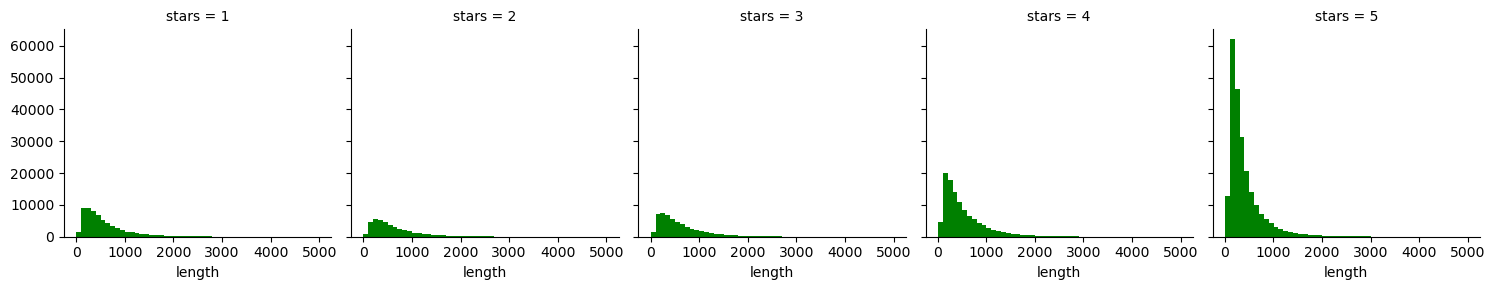

In [13]:
# COMPARING TEXT LENGTH TO STARS
plt.figure(figsize=(20,5))
graph = sns.FacetGrid(data=restaurants_reviews,col='stars')
graph.map(plt.hist,'length',bins=50,color='Green')

In [14]:
df1 = pd.DataFrame(restaurants_reviews['stars'].value_counts()).reset_index().sort_values(by='index')

In [15]:
df2= df1.set_index("index")
df2

,stars
index,
1,61678
2,41602
3,54053
4,110611
5,229943


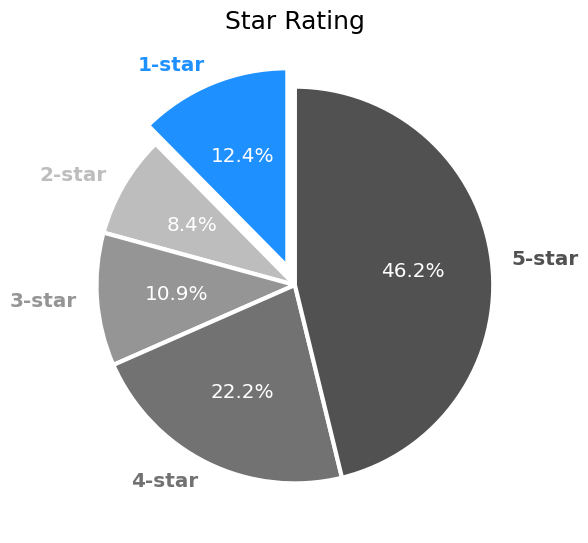

In [16]:
import numpy as np
labels = ["1-star", "2-star", "3-star", "4-star","5-star"]
fig, ax = plt.subplots(figsize=(6, 6))

# Get four different grey colors.
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.25, 0.75, len(df2))))
# Swap in a bright blue for the Lacrosse color.
colors[0] = 'dodgerblue'

# You could also just manually assign colors very easily.
# colors = ['purple', 'black', 'pink', 'aqua']

patches, texts, pcts = ax.pie(
    df2['stars'], labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1,0, 0, 0, 0))

for i, patch in enumerate(patches):
  # You could also do something like this if you want to assign colors
  # by some rule or by value.
  # if texts[i].get_text() == 'Lacrosse':
  #   patch.set_facecolor('dodgerblue')
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Star Rating', fontsize=18)
plt.tight_layout()

#matplotlib pie chart with explode and custom colors

In [17]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
df_num=restaurants_reviews[['stars', 'useful',
       'funny', 'cool', 'length']]
df_num.corr()


,stars,useful,funny,cool,length
stars,1.000000,-0.025019,-0.038354,0.051946,-0.179627
useful,-0.025019,1.000000,0.817878,0.884925,0.255985
funny,-0.038354,0.817878,1.000000,0.869569,0.190020
cool,0.051946,0.884925,0.869569,1.000000,0.181002
length,-0.179627,0.255985,0.190020,0.181002,1.000000


Thus, we can see that there is strong positive correlation between:
* Cool and Useful
* Cool and Funny

In [18]:
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
restaurants_reviews['Target'] = ''
restaurants_reviews.loc[restaurants_reviews.stars >=3.5, 'Target'] = '1'
restaurants_reviews.loc[restaurants_reviews.stars==3,'Target'] = '3'
restaurants_reviews.loc[restaurants_reviews.stars <=2.5, 'Target'] = '0'

restaurants_reviews.drop(restaurants_reviews.loc[restaurants_reviews['Target']=='3'].index,axis=0,inplace=True)
restaurants_reviews.Target.value_counts()

1    340554
0    103280
Name: Target, dtype: int64

### Here we are Converting the text to Lowercase and removing the unnecessary punctuation

In [19]:
# convert text to lower case

restaurants_reviews.text = restaurants_reviews.text.str.lower()

## remove unnecessary punctuation
restaurants_reviews['removed_punct_text']= restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').str.replace('[0-9]*[+-:]*[0-9]+', '')

restaurants_reviews['removed_punct_text'].head()

0    i think its funny when people bitch that there...
2    i eat at pagelli's italiano for the first time...
3    went here for the early dinner special before ...
4    went for dinner and never even got our food  t...
6    the fettuccine alfredo is fantastic at pagelli...
Name: removed_punct_text, dtype: object

In [20]:
df_final = restaurants_reviews[['removed_punct_text','Target']]
df_final = df_final.reset_index()

In [21]:
df_final.rename(columns = {'index':'rem'}, inplace = True)
df_final

,rem,removed_punct_text,Target
0,0,i think its funny when people bitch that there...,1
1,2,i eat at pagelli's italiano for the first time...,1
2,3,went here for the early dinner special before ...,1
3,4,went for dinner and never even got our food t...,0
4,6,the fettuccine alfredo is fantastic at pagelli...,1
...,...,...,...
443829,497879,i drive by this everyday so i decided to try i...,0
443830,497880,last night a friend and l went to gyros on th ...,0
443831,497881,as expensive as they are i was hoping for a gr...,0
443832,497882,ok my gyro was loaded with meat and it was coo...,1


In [22]:
df_final.drop('rem',axis=1,inplace=True)

In [23]:
df_final.Target = df_final.Target.astype('int')

In [24]:
df_final.columns

Index(['removed_punct_text', 'Target'], dtype='object')

In [25]:
df_final.head()

,removed_punct_text,Target
0,i think its funny when people bitch that there...,1
1,i eat at pagelli's italiano for the first time...,1
2,went here for the early dinner special before ...,1
3,went for dinner and never even got our food t...,0
4,the fettuccine alfredo is fantastic at pagelli...,1


In [26]:
df_final.tail()

,removed_punct_text,Target
443829,i drive by this everyday so i decided to try i...,0
443830,last night a friend and l went to gyros on th ...,0
443831,as expensive as they are i was hoping for a gr...,0
443832,ok my gyro was loaded with meat and it was coo...,1
443833,worst customer service i've ever encountered m...,0


## For Creating the Word Cloud

In [27]:
df_final.Target = df_final.Target.astype('int')

In [28]:
pos = pd.DataFrame(df_final[df_final['Target']==1]['removed_punct_text'])
neg = pd.DataFrame(df_final[df_final['Target']==0]['removed_punct_text'])

In [29]:
pos.head(5)

,removed_punct_text
0,i think its funny when people bitch that there...
1,i eat at pagelli's italiano for the first time...
2,went here for the early dinner special before ...
4,the fettuccine alfredo is fantastic at pagelli...
7,pagellis is by far one of my favorite places t...


In [30]:
neg.head(5)

,removed_punct_text
3,went for dinner and never even got our food t...
5,i dont know what happened but they changed han...
6,you get no cell signal whatsoever here and no ...
8,i went here last night with my fiance for dinn...
9,always on the search for good italian cuisine ...


In [31]:
pos = pos.reset_index().drop('index',axis=1)
neg = neg.reset_index().drop('index',axis=1)

In [32]:
# Import the necessary modules from the Natural Language Toolkit library
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [33]:
# Print the list of stopwords in the English language
print(stopwords.words('english'))

# Assign the list of English stopwords to the variable 'stops'
stops = stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
# Define lists of uninformative or unnecessary words for text analysis 
unuseful_positive_words = ['place','restaurants','make','really','service','definitely']

unuseful_negative_words =  ['food','asked','two','minute','place','got','said','salad','back',\
                            'customer','nice','menu','made','great',\
                            'came','restaurant','better','sauce','want','good','took','eat']
unuseful_words = unuseful_positive_words + unuseful_negative_words

## Creating corpus for positive sentiments

In [35]:
pos_corpus = []  # Initialize an empty list to store the processed text data

# Loop over each row in the positive reviews dataset
for i in range(0, pos.shape[0]):
    
    text = (pos['removed_punct_text'][i])  # Get the text of the i-th review
    
    text = text.lower()  # Convert all text to lowercase for consistency
    
    text = text.split()  # Split the text into a list of individual words
    
    text = [word for word in text if not word in set(stops)]  # Remove stopwords from the text
    
    text = [word for word in text if not word in unuseful_positive_words]  # Remove unuseful positive words from the text
    
    text = ' '.join(text)  # Join the words back together into a single string
    
    pos_corpus.append(text)  # Add the processed text to the corpus list

In [36]:
# Converting the Corpus into string format
pos_corp_str = str(pos_corpus)


In [42]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 607.8 kB/s eta 0:00:00


In [37]:
from wordcloud import WordCloud,ImageColorGenerator
from os import path
from PIL import Image

In [38]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 10 # 0 - 360
    s = 100 # 0 - 100
    l = np.random.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [39]:
def similar_color_func2(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 110 # 0 - 360
    s = 100  # 0 - 100
    l = np.random.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)  

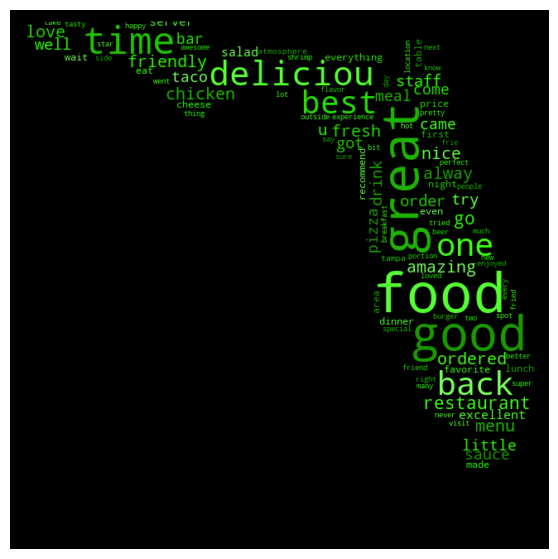

In [40]:
pos_mask = np.array(Image.open("florida.jpg"))
colors = ImageColorGenerator(pos_mask)
text_pos = pos_corp_str

# Create a word cloud image
wc_pos = WordCloud(max_words=100, mask=pos_mask,
                   contour_width=10, background_color="black",contour_color='black',
                   collocations=False)
wc_pos.generate(text_pos)
wc_pos.recolor(color_func=similar_color_func2)
# Generate a wordcloud


plt.figure(figsize=(20,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

## Creating corpus for negative sentiments

In [41]:
neg_corpus = []
for i in range(0, neg.shape[0]):
    text= (neg['removed_punct_text'][i])
    text = text.lower()
    text= text.split()
    text= [word for word in text if not word in set(stops)]
    text=[word for word in text if not word in unuseful_negative_words]
    text = ' '.join(text)
    neg_corpus.append(text)

In [42]:
neg_corp_str = str(neg_corpus)


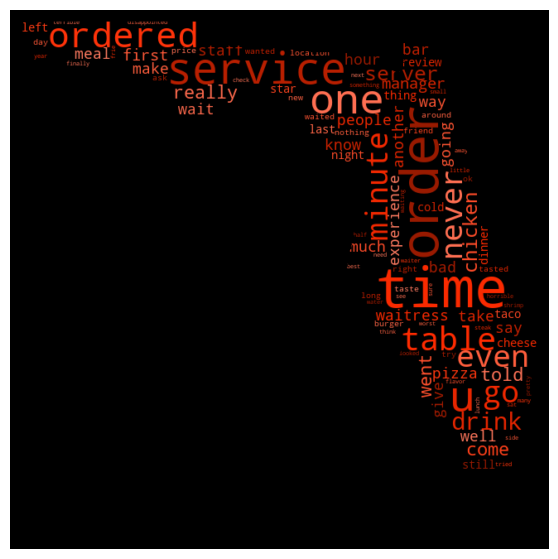

In [43]:
neg_mask = np.array(Image.open("florida.jpg"))
colors = ImageColorGenerator(neg_mask)
text_neg = neg_corp_str

# Create a word cloud image
wc_pos = WordCloud(width = 3000, height = 2000, max_words=100, mask=neg_mask,
                   contour_width=10, background_color="black",contour_color='black',collocations=False)

# Generate a wordcloud
wc_pos.generate(text_neg)
wc_pos.recolor(color_func=similar_color_func)
plt.figure(figsize=(20,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
df_final.shape

(443834, 2)

## Splitting Dataset into three equal parts and  shuffling the dataset

In [45]:
df_filter = df_final[df_final['Target'] ==1]
num_rows = len(df_filter)
subset_size = num_rows // 3
df_subset_1 = df_filter.iloc[:subset_size]
df_subset_2 = df_filter.iloc[subset_size:2*subset_size]
df_subset_3 = df_filter.iloc[2*subset_size:]

In [46]:
df_subset_1

,removed_punct_text,Target
0,i think its funny when people bitch that there...,1
1,i eat at pagelli's italiano for the first time...,1
2,went here for the early dinner special before ...,1
4,the fettuccine alfredo is fantastic at pagelli...,1
7,pagellis is by far one of my favorite places t...,1
...,...,...
149359,the food and service are always spot on here i...,1
149360,great food very fresh and tasty service is fas...,1
149361,this place was great i had the chicken parm wi...,1
149362,tried take out from here the other day and it ...,1


In [47]:
df_neg=df_final[df_final['Target']==0].sample(100000)

In [48]:
df_neg

,removed_punct_text,Target
114620,attention vegns do not eat here i ordered the ...,0
191125,typical diner atmosphere seated quickly friend...,0
40335,wanted to watch the world cup final today with...,0
347288,have not been to mi casa in a year or so i or...,0
47096,poor atmosphere poor service unwelcoming and u...,0
...,...,...
154618,eh not impressed no ac in this place with only...,0
346779,avoid if you are on lunch hour they have no co...,0
61152,may be the worst dining experience we have had...,0
127543,how did this place get stars granted we are c...,0


In [49]:
df_join1=pd.concat([df_subset_1,df_neg],axis=0)
df_join2=pd.concat([df_subset_2,df_neg],axis=0)
df_join3=pd.concat([df_subset_3,df_neg],axis=0)


In [50]:
df_join1=df_join1.sample(frac=1)

In [51]:
df_join2=df_join1.sample(frac=1)

In [52]:
df_join3=df_join1.sample(frac=1)

In [53]:
df_join1.shape

(213518, 2)

In [54]:
df_join2.shape

(213518, 2)

In [55]:
df_join3.shape

(213518, 2)

In [56]:
df_join2

,removed_punct_text,Target
121935,thoroughly impressed so much i thought about t...,1
141250,the staff was very friendly and the food was v...,1
31311,excellent indian restaurant order spicy only i...,1
90413,the food is amazing tomatillo salsa is amazi...,1
23690,waitress was awful no personality no lights ov...,0
...,...,...
89907,let me begin by saying how happy i am that dat...,1
18153,great ambiance the place isn't that big but th...,1
53374,ok this is an update from my last review now t...,1
121467,noticed the name had changed very recently fro...,0


In [57]:
df_join1

,removed_punct_text,Target
86020,pricey for poor quality and value my chicken c...,0
81562,cask has all the hallmarks of a great place bu...,0
70980,i am always on the hunt for a place with good ...,1
139595,dollars for a domestic draft beer kiss my a t...,0
135016,they have delicious lasagna service was very ...,1
...,...,...
122497,this was the restaurant at our hotel and we ca...,1
23331,best italian restaurant in st pete beautiful a...,1
334606,really people get your italian on the staff ...,0
18460,this place is amazing i went there and had som...,1


In [58]:
df_join1 = df_join1.reset_index()
df_join2 = df_join2.reset_index()
df_join3 = df_join3.reset_index()

In [59]:
df_join1

,index,removed_punct_text,Target
0,86020,pricey for poor quality and value my chicken c...,0
1,81562,cask has all the hallmarks of a great place bu...,0
2,70980,i am always on the hunt for a place with good ...,1
3,139595,dollars for a domestic draft beer kiss my a t...,0
4,135016,they have delicious lasagna service was very ...,1
...,...,...,...
213513,122497,this was the restaurant at our hotel and we ca...,1
213514,23331,best italian restaurant in st pete beautiful a...,1
213515,334606,really people get your italian on the staff ...,0
213516,18460,this place is amazing i went there and had som...,1


In [60]:
df_join1.drop('index',axis=1, inplace=True)
df_join1

,removed_punct_text,Target
0,pricey for poor quality and value my chicken c...,0
1,cask has all the hallmarks of a great place bu...,0
2,i am always on the hunt for a place with good ...,1
3,dollars for a domestic draft beer kiss my a t...,0
4,they have delicious lasagna service was very ...,1
...,...,...
213513,this was the restaurant at our hotel and we ca...,1
213514,best italian restaurant in st pete beautiful a...,1
213515,really people get your italian on the staff ...,0
213516,this place is amazing i went there and had som...,1


In [61]:
df_join2.drop('index',axis=1, inplace=True)
df_join2

,removed_punct_text,Target
0,thoroughly impressed so much i thought about t...,1
1,the staff was very friendly and the food was v...,1
2,excellent indian restaurant order spicy only i...,1
3,the food is amazing tomatillo salsa is amazi...,1
4,waitress was awful no personality no lights ov...,0
...,...,...
213513,let me begin by saying how happy i am that dat...,1
213514,great ambiance the place isn't that big but th...,1
213515,ok this is an update from my last review now t...,1
213516,noticed the name had changed very recently fro...,0


In [62]:
df_join3.drop('index',axis=1, inplace=True)
df_join3

,removed_punct_text,Target
0,if you've been wanting authentic exceptional i...,1
1,i have been to this location multiple times ev...,1
2,so after we decided to order uber eats from be...,0
3,starsfor me i have to say that the last time ...,1
4,don't be fooled by its noncommercialism or lac...,1
...,...,...
213513,went there for a romantic lunch and left disgu...,0
213514,amazing pizza went in for lunch today and orde...,1
213515,horribly inconsistent we drove an hour from wi...,0
213516,this place had a really cool look but can't sa...,0


In [63]:
# Cleaning the texts
# we have to do this for all three dataset 
# this is for dataset1
# It just for model comaparision
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
corpus1 = []
for i in range(0, df_join1.shape[0]):
    review = df_join1['removed_punct_text'][i]
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus1.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOURABH_JAMDADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Testing

In [128]:
## only for testing purpose 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
corpus4 = []
for i in range(0, df_join1.shape[0]):
    review = df_join1['removed_punct_text'][i]
    review = review.lower()
    review = review.strip()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus4.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOURABH_JAMDADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# cv = TfidfVectorizer(max_features = 3000)
# X4 = cv.fit_transform(corpus4).toarray()
# #X = pd.DataFrame(X,columns=cv.get_feature_names_out())
# y4 = df_join1.iloc[:, 1]


MemoryError: Unable to allocate 4.77 GiB for an array with shape (213518, 3000) and data type float64

In [ ]:
# # Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, 
#                                                     test_size = 0.20, 
#                                                     random_state = 2023,
#                                                     stratify=y1)

# Testing 

In [64]:
# Cleaning the texts
# we have to do this for all three dataset 
# this is for dataset2
# It just for model comaparision
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
corpus2 = []
for i in range(0, df_join2.shape[0]):
    review = df_join2['removed_punct_text'][i]
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus2.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOURABH_JAMDADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
# Cleaning the texts
# we have to do this for all three dataset 
# this is for dataset3
# It just for model comaparision
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
corpus3 = []
for i in range(0, df_join3.shape[0]):
    review = df_join3['removed_punct_text'][i]
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus3.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOURABH_JAMDADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 3000)
X1 = cv.fit_transform(corpus1).toarray()
#X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y1 = df_join1.iloc[:, 1]


In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, 
                                                    test_size = 0.20, 
                                                    random_state = 2023,
                                                    stratify=y1)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 3000)
X2 = cv.fit_transform(corpus2).toarray()
#X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y2= df_join2.iloc[:, 1]




In [69]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, 
                                                    test_size = 0.20, 
                                                    random_state = 2023,
                                                    stratify=y2)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 3000)
X3 = cv.fit_transform(corpus3).toarray()
#X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y3 = df_join3.iloc[:, 1]




In [71]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, 
                                                    test_size = 0.20, 
                                                    random_state = 2023,
                                                    stratify=y3)

## Random_Forest

In [72]:
# Random_Forest for dataset1:
# Fitting any algo to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=2022,n_estimators=25)
classifier.fit(X_train1, y_train1)

# Predicting the Test set results
y_pred_rf = classifier.predict(X_test1)
### Predicted Probabilities
y_pred_prob_rf = classifier.predict_proba(X_test1)[:,1]

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score
confusion_matrix(y_test1, y_pred_rf)

print(classification_report(y_test1, y_pred_rf))

print(accuracy_score(y_test1, y_pred_rf))

print(roc_auc_score(y_test1, y_pred_prob_rf))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     20000
           1       0.92      0.92      0.92     22704

    accuracy                           0.92     42704
   macro avg       0.92      0.92      0.92     42704
weighted avg       0.92      0.92      0.92     42704

0.9175018733608092
0.972993050784003


In [78]:
# save the trained logistic regression model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)


## XGboost

In [73]:
from xgboost import XGBClassifier

In [74]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score


In [75]:
# Define the batch size
batch_size = 20000

# Train the XGBoost model in batches
XGB_model = XGBClassifier(random_state=2023)

for i in range(0, len(X_train3), batch_size):
    X_batch = X_train3[i:i+batch_size]
    y_batch = y_train3[i:i+batch_size]
    
    # Fit the XGBoost model on the current batch
    XGB_model.fit(X_batch, y_batch)

# Make predictions on the test set in batches
y_pred_all = []
y_pred_prob_all = []

for i in range(0, len(X_test3), batch_size):
    X_batch = X_test3[i:i+batch_size]
    y_pred_batch = XGB_model.predict(X_batch)
    y_pred_prob_batch = XGB_model.predict_proba(X_batch)[:, 1]
    y_pred_all.extend(y_pred_batch)
    y_pred_prob_all.extend(y_pred_prob_batch)

# Calculate the final accuracy score, confusion matrix, and ROC AUC score
accuracy = accuracy_score(y_test3, y_pred_all)
cm = confusion_matrix(y_test3, y_pred_all)
roc_auc = roc_auc_score(y_test3, y_pred_prob_all)

print('Accuracy:', accuracy)
print('Confusion matrix:', cm)
print('ROC AUC score:', roc_auc)

Accuracy: 0.916822780067441
Confusion matrix: [[18238  1762]
 [ 1790 20914]]
ROC AUC score: 0.9738378347427765


In [82]:
# save the trained XGBoost model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(XGB_model, file)


## LightGBM

In [76]:
## for dataset3
## lightgbm

from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(random_state=2023)
lgbm.fit(X_train3, y_train3)
# Predicting the Test set results
y_pred_lgbm = lgbm.predict(X_test3)
### Predicted Probabilities
y_pred_prob_lgbm = lgbm.predict_proba(X_test3)[:,1]

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score
confusion_matrix(y_test3, y_pred_lgbm)


array([[18351,  1649],
       [ 1411, 21293]], dtype=int64)

In [77]:
print(classification_report(y_test3, y_pred_lgbm))
print(accuracy_score(y_test3, y_pred_lgbm))
print(roc_auc_score(y_test3, y_pred_prob_lgbm))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     20000
           1       0.93      0.94      0.93     22704

    accuracy                           0.93     42704
   macro avg       0.93      0.93      0.93     42704
weighted avg       0.93      0.93      0.93     42704

0.928343949044586
0.9812144545014094


In [85]:
# save the trained XGBoost model to a file
with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm, file)

## Support Vector Machine

In [86]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [87]:
# Define the batch size
batch_size = 10000

# Train the SVM model in batches
svm = SVC(kernel='linear', C=2, random_state=2023)

for i in range(0, len(X_train2), batch_size):
    X_batch = X_train2[i:i+batch_size]
    y_batch = y_train2[i:i+batch_size]
    
    # Fit the SVM model on the current batch
    svm.fit(X_batch, y_batch)

# Make predictions on the test set in batches
y_pred_all = []

for i in range(0, len(X_test2), batch_size):
    X_batch = X_test2[i:i+batch_size]
    y_pred_batch = svm.predict(X_batch)
    y_pred_all.extend(y_pred_batch)


KeyboardInterrupt: 

In [101]:
# Calculate the final accuracy score and confusion matrix
accuracy = accuracy_score(y_test2, y_pred_all)
cm = confusion_matrix(y_test2, y_pred_all)
print('Accuracy:', accuracy)
print('Confusion matrix:', cm)

Accuracy: 0.8901976395653803
Confusion matrix: [[17806  2194]
 [ 2495 20209]]


In [102]:
# Calculate and print the classification report and ROC AUC score
print(classification_report(y_test2, y_pred_all))
y_pred_prob = svm.decision_function(X_test2)
print('ROC AUC score:', roc_auc_score(y_test2, y_pred_prob))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     20000
           1       0.90      0.89      0.90     22704

    accuracy                           0.89     42704
   macro avg       0.89      0.89      0.89     42704
weighted avg       0.89      0.89      0.89     42704

ROC AUC score: 0.958054957276251


In [ ]:
# save the trained XGBoost model to a file
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file)

## Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score


In [81]:
import warnings
warnings.filterwarnings("ignore")

# Fitting Logistic regression to the training set
lr=LogisticRegression(random_state=2023)
lr.fit(X_train2, y_train2)
y_pred_lr=lr.predict(X_test2)
y_pred_prob_lr = lr.predict_proba(X_test2)[:,1]


In [82]:
print(confusion_matrix(y_test2, y_pred_lr))
print(classification_report(y_test2, y_pred_lr))
print(accuracy_score(y_test2, y_pred_lr))
print(roc_auc_score(y_test2, y_pred_prob_lr))

[[18964  1036]
 [ 1059 21645]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     20000
           1       0.95      0.95      0.95     22704

    accuracy                           0.95     42704
   macro avg       0.95      0.95      0.95     42704
weighted avg       0.95      0.95      0.95     42704

0.9509413638066692
0.9895255582716703


## Pickeling the Machine learning Model

In [75]:
import pickle

In [76]:
# save the trained logistic regression model to a file
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)


In [ ]:

# load the saved logistic regression model in a Streamlit app
with open('lr_model.pkl','rb') as file:
    lr_model = pickle.load(file)

## Appliying the Voting

In [171]:
Voting_sample=df_final.sample(50000)

In [172]:
Voting_sample

,removed_punct_text,Target
96521,great local spot with good drinks and food lov...,1
417321,we love the brunch it's definately worth waiti...,1
256797,a year ago i would have given this place five ...,0
63482,my husband and i went to madfish tonight for t...,0
414601,the food is good but the service is absolutely...,0
...,...,...
17962,i am only giving this place stars because it ...,0
180664,me and my lunch companion visited sea salt tod...,1
154974,wings and wedges are delicious if you like swe...,1
30304,fantastic experience fun and lively ambiance w...,1


In [174]:
Voting_sample=Voting_sample.reset_index()

In [175]:
Voting_sample

,index,removed_punct_text,Target
0,96521,great local spot with good drinks and food lov...,1
1,417321,we love the brunch it's definately worth waiti...,1
2,256797,a year ago i would have given this place five ...,0
3,63482,my husband and i went to madfish tonight for t...,0
4,414601,the food is good but the service is absolutely...,0
...,...,...,...
49995,17962,i am only giving this place stars because it ...,0
49996,180664,me and my lunch companion visited sea salt tod...,1
49997,154974,wings and wedges are delicious if you like swe...,1
49998,30304,fantastic experience fun and lively ambiance w...,1


In [176]:
Voting_sample.rename(columns = {'index':'rem'}, inplace = True)
Voting_sample

,rem,removed_punct_text,Target
0,96521,great local spot with good drinks and food lov...,1
1,417321,we love the brunch it's definately worth waiti...,1
2,256797,a year ago i would have given this place five ...,0
3,63482,my husband and i went to madfish tonight for t...,0
4,414601,the food is good but the service is absolutely...,0
...,...,...,...
49995,17962,i am only giving this place stars because it ...,0
49996,180664,me and my lunch companion visited sea salt tod...,1
49997,154974,wings and wedges are delicious if you like swe...,1
49998,30304,fantastic experience fun and lively ambiance w...,1


In [177]:
Voting_sample.drop('rem',axis=1,inplace=True)

In [178]:
Voting_sample

,removed_punct_text,Target
0,great local spot with good drinks and food lov...,1
1,we love the brunch it's definately worth waiti...,1
2,a year ago i would have given this place five ...,0
3,my husband and i went to madfish tonight for t...,0
4,the food is good but the service is absolutely...,0
...,...,...
49995,i am only giving this place stars because it ...,0
49996,me and my lunch companion visited sea salt tod...,1
49997,wings and wedges are delicious if you like swe...,1
49998,fantastic experience fun and lively ambiance w...,1


In [180]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
corpus_Voting_sample = []
for i in range(0, Voting_sample.shape[0]):
    review = Voting_sample['removed_punct_text'][i]
    review = review.lower()
    review = review.strip().split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus_Voting_sample.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOURABH_JAMDADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 3000)
X_test_vote = cv.fit_transform(corpus_Voting_sample).toarray()
#X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y_test_vote= df_test.iloc[:, 1]

In [100]:
Ytest_voting=Voting_sample['Target']
Ytest_voting

156380    1
148139    0
30829     1
42030     1
128510    0
         ..
170468    1
102693    1
322413    0
239294    1
13639     1
Name: Target, Length: 50000, dtype: int32

In [187]:
def voting(x_test,mod1,mod2,mod3):
    ypred_mod1=mod1.predict(x_test)
    ypred_mod2=mod2.predict(x_test)
    ypred_mod3=mod3.predict(x_test)
    return pd.DataFrame([ypred_mod1, ypred_mod2, ypred_mod3]).T


In [197]:
a=classifier.predict(X_test_vote)

In [198]:
a

array([1, 1, 1, ..., 0, 0, 1])

In [205]:
print(accuracy_score(Ytest_voting,a))

0.52062


In [200]:
b=XGB_model.predict(X_test_vote)

In [201]:
print(accuracy_score(b,temp_pred))

0.90598


In [206]:
print(accuracy_score(Ytest_voting,b))

0.42158


In [207]:
c=lgbm.predict(X_test_vote)

In [208]:
print(accuracy_score(c,temp_pred))

0.96296


In [209]:
print(accuracy_score(Ytest_voting,c))

0.42158


In [190]:
temp=voting(X_test_vote,classifier,XGB_model,lgbm)

In [191]:
temp.columns=['R_forest','XGBoost','lightGBM']

In [192]:
temp

,R_forest,XGBoost,lightGBM
0,1,0,0
1,1,1,1
2,1,1,1
3,0,0,0
4,0,0,0
...,...,...,...
49995,0,0,0
49996,0,0,0
49997,0,0,0
49998,0,0,0


In [193]:
temp['Final']=temp.sum(axis=1)

In [194]:
temp['pred']=np.where(temp['Final']<2,0,1)
temp

,R_forest,XGBoost,lightGBM,Final,pred
0,1,0,0,1,0
1,1,1,1,3,1
2,1,1,1,3,1
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
49995,0,0,0,0,0
49996,0,0,0,0,0
49997,0,0,0,0,0
49998,0,0,0,0,0


In [195]:
temp_pred=temp['pred']

In [196]:
## Accuracy score
print(accuracy_score(Ytest_voting,temp_pred))

0.42598


In [185]:
ypred_1

array([1, 1, 1, ..., 0, 0, 1])

In [89]:
import numpy as np
y_lgbm = np.random.randint(0,2,25)
y_xg = np.random.randint(0,2,25)
y_rf = np.random.randint(0,2,25)

In [90]:
temp = pd.DataFrame([y_lgbm,y_xg,y_rf]).T

In [104]:
temp.columns=['LGBM','XG','RF']

In [115]:
temp['Final']=temp.sum(axis=1)

In [117]:
temp['pred']=np.where(temp['Final']<2,0,1)
temp

,LGBM,XG,RF,Final,pred
0,1,0,0,1.0,0
1,1,1,0,2.0,1
2,0,1,0,1.0,0
3,1,0,1,2.0,1
4,0,0,1,1.0,0
5,1,0,0,1.0,0
6,1,1,0,2.0,1
7,1,0,1,2.0,1
8,1,0,1,2.0,1
9,1,0,0,1.0,0
